In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

population = [2, 5, 2, 10, 6]


In [6]:
sample_size = 7
pop_mean = np.mean(population)
sample = np.random.choice(population, size=sample_size)

In [5]:
# test for consistency

def test_consistency(population, estimator,
                     min_size = 100,
                     max_size = 1000000,
                     size_step = 100):
    estimates = []
    pop_mean = np.mean(population)
    sample_sizes = range(min_size, max_size, size_step)
    
    for sample_size in sample_sizes:
        sample = np.random.choice(population, size=sample_size)
        estimate = estimator(sample)
        estimates.append(estimate)
        
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(sample_sizes, estimates, '.', label='estimate')
    ax1.plot(sample_sizes, np.ones_like(sample_sizes) * pop_mean)
    ax2.plot(sample_sizes, np.abs(np.array(estimates) - pop_mean), '.')
    ax2.plot(sample_sizes, np.zeros_like(sample_sizes) * pop_mean)
             
        

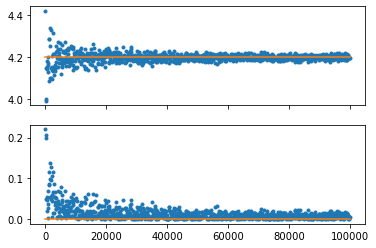

In [7]:
population = [1, 2, 5, 4, 9]
test_consistency(population, np.mean, max_size=100000)

In [10]:
# this is not consistent estimator

def first_element(sample):
    return sample[0]

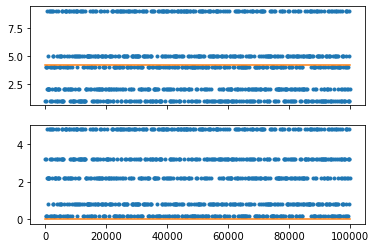

In [11]:
test_consistency(population, first_element, max_size=100000)

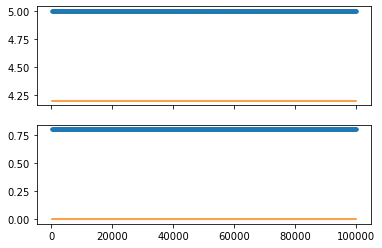

In [12]:
# this is not consistent estimator

def mid_range(sample):
    return (np.max(sample) + np.min(sample)) / 2

test_consistency(population, mid_range, max_size=100000)

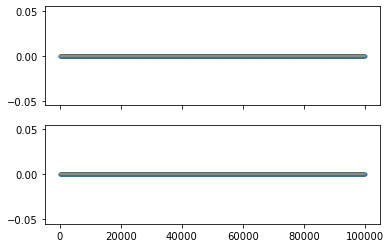

In [13]:
test_consistency([-1, 1, -2, 2], mid_range, max_size=100000) # mid_range consistent for this population

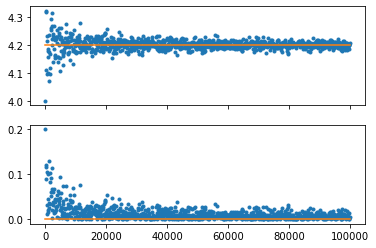

In [15]:
def mean_with_coeff(sample):  # this is consistent estimator because n/(n-1) tends to 1 as n gets large
    n = len(sample)
    return np.mean(sample) * n / (n - 1)

test_consistency(population, mean_with_coeff, max_size=100000)

In [17]:
# test for unbiasedness

def find_bias(population, estimator, sample_size, iterations=100000):
    estimates = []
    pop_mean = np.mean(population)
    
    for i in range(iterations):
        sample = np.random.choice(population, size=sample_size)  # lots of sample of the same size
        estimate = estimator(sample)
        estimates.append(estimate)
        
    return np.abs(np.mean(estimates) - pop_mean)
        
        

In [23]:
population = [1, 2, 5, 4, 8, 4]
find_bias(population, np.mean, 10) # changing sample size does not make a big diffrenece

0.0004670000000008834

In [25]:
np.std(population) # bias is small compared to std of this population so we can say that it is unbaised estimator

2.23606797749979

In [27]:
find_bias(population, mean_with_coeff, 3) # bias is large

2.010625

In [29]:
find_bias(population, mean_with_coeff, 10) # bias is still large but descreases for larger n

0.44470777777777837

In [30]:
find_bias(population, first_element, 5) # good bias (unbiased) but not consistent

0.0028199999999998226